# Loading dataset

In [1]:
import pandas as pd
train = pd.read_csv('train.csv', delimiter = ',').set_index('Id')
test = pd.read_csv('test.csv', delimiter = ',').set_index('Id')

y = train.SalePrice
X = train.drop(columns = 'SalePrice')
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


# Handling missing values

## Trainig set

In [2]:
# Training set

X.isnull().sum().sort_values(ascending = False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageQual        81
GarageCond        81
GarageFinish      81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtFinType1      37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
BedroomAbvGr       0
dtype: int64

In [3]:
# For GarageYrBlt and MasVnrArea, Fill NA as 0

X['GarageYrBlt'] = X['GarageYrBlt'].fillna(0)
X['MasVnrArea'] = X['MasVnrArea'].fillna(0)

# For NA values as a category, fill 'NA'
Col_fill_na = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'GarageType', 'GarageCond', 'GarageFinish', 'GarageQual', 'BsmtExposure', 
       'BsmtFinType2', 'BsmtCond', 'BsmtFinType1', 'BsmtQual', 'MasVnrType']
X[Col_fill_na] = X[Col_fill_na].fillna('NA')

# Check basement-related features: bmst
# bsmt = X.columns[[n.startswith('Bsmt') for n in X.columns]]
# X[X.BsmtFinType2.isnull()][bsmt]

# Almost all NA in BsmtExposure means no basement, except for Id949
# Change the BsmtExposure of Id949 into 'No'
X.loc[949, 'BsmtExposure'] = 'No'

# Almost all NA in BsmtFinType2 means no type2 basement, except for Id333 
# Change the BsmtFinType2 of Id333 into 'Unf'
X.loc[333,'BsmtFinType2'] = 'Unf'

# Fill NA in Electrical as standard type 'SBrkr'

X['Electrical'] = X['Electrical'].fillna('SBrkr')

# For the LotFrontage, Groupby Neighborhood and fill the median
X['LotFrontage'] = X.groupby('Neighborhood')['LotFrontage'].apply(lambda x: x.fillna(x.median()))

# Check if all missing values are filled
X.isnull().sum().sort_values(ascending = False).head(20)

MSSubClass      0
BedroomAbvGr    0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
HalfBath        0
GarageFinish    0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
GarageYrBlt     0
GarageCars      0
dtype: int64

## test set

In [4]:
# Test Set
test.isnull().sum().sort_values(ascending = False).head(28)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageFinish      78
GarageQual        78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType2      42
BsmtFinType1      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
KitchenQual        1
SaleType           1
BsmtFinSF1         1
GarageCars         1
BsmtUnfSF          1
dtype: int64

In [5]:
# Check where GarageCond is NA while GarageType is not
# garage = test.columns[[n.startswith('Garage') for n in test.columns]]
# test[test['GarageCond'].isnull()&test['GarageType'].notnull()][garage]

# For : id2127 and id2577, fill GarageYrBlt into YearBuilt
test.loc[[2127,2577], 'GarageYrBlt'] = test.loc[[2127,2577], 'YearBuilt']

# For other NA in GarageYrBlt, fill with 0
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(0)

# Fill other NA values with the most frequent values goupedby GarageYrBlt

most_frequent = lambda x: x.fillna(x.value_counts().idxmax())
garage_group = ['GarageYrBlt', 'GarageType']
test.loc[[2127, 2577],'GarageFinish'] = test.groupby(garage_group)['GarageFinish'].apply(most_frequent).loc[[2127,2577]]
test.loc[[2127, 2577],'GarageQual'] = test.groupby(garage_group)['GarageQual'].apply(most_frequent).loc[[2127,2577]]
test.loc[[2127, 2577],'GarageCond'] = test.groupby(garage_group)['GarageCond'].apply(most_frequent).loc[[2127,2577]]
test.loc[2577,'GarageCars'] = test.groupby(garage_group)['GarageCars'].apply(most_frequent).loc[2577]
test.loc[2577,'GarageArea'] = test.groupby(garage_group)['GarageArea'].apply(most_frequent).loc[2577]

# Check basement features with NA
# bsmt = test.columns[test.columns.str.contains('Bsmt')]
# test[test.BsmtFullBath.isnull()][bsmt]
# No basement for only one row, fill these values with 0
test[['BsmtHalfBath','BsmtFullBath','BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']] = test[['BsmtHalfBath','BsmtFullBath','BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']].fillna(0)

# For id2041, id2186, id2525, fill BsmtCond by the mode of grouped BsmtQual
test.loc[[2041, 2186, 2525], 'BsmtCond'] = test.groupby('BsmtQual')['BsmtCond'].apply(most_frequent).loc[[2041, 2186, 2525]]
# For id2218, id2219, fill BsmtCond by the mode of grouped BsmtCond
test.loc[[2218, 2219], 'BsmtQual'] = test.groupby('BsmtCond')['BsmtQual'].apply(most_frequent).loc[[2218, 2219]]
# For id1488 & id2349, fill BsmtExposure with 'No' 
test.loc[[1488, 2349], 'BsmtExposure'] = 'No'

# For id2611, fill the MasVnrType with mode of Grouped MasVnrArea
test.loc[2611, 'MasVnrType'] = test.groupby('MasVnrArea')['MasVnrType'].apply(most_frequent).loc[2611]

# For other Na in MasVnrArea & GarageYrBlt, fill with 0
test['MasVnrArea'] = test['MasVnrArea'].fillna(0)

# For MSZoning, Functional, Utilities, KitchenQual, Exterior1st, Exterior2nd, SaleType
# Fill NA with the most frequent values
test[['MSZoning', 'Functional', 'Utilities', 'KitchenQual','Exterior1st', 'Exterior2nd', 'SaleType']] = test[['MSZoning', 'Functional', 'Utilities', 'KitchenQual','Exterior1st', 'Exterior2nd', 'SaleType']].apply(most_frequent)

# For NA values as a category, fill 'NA'
Col_fill_na = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'GarageType', 'GarageCond', 'GarageFinish', 'GarageQual', 'BsmtExposure', 
       'BsmtFinType2', 'BsmtCond', 'BsmtFinType1', 'BsmtQual', 'MasVnrType']
test[Col_fill_na] = test[Col_fill_na].fillna('NA')

# For the LotFrontage, Groupby Neighborhood and fill the median
test['LotFrontage'] = test.groupby('Neighborhood')['LotFrontage'].apply(lambda x: x.fillna(x.median()))

# Check if all missing values are filled
test.isnull().sum().sort_values(ascending = False).head(28)


MSSubClass      0
BedroomAbvGr    0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
HalfBath        0
GarageFinish    0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
GarageYrBlt     0
GarageCars      0
CentralAir      0
PoolArea        0
SaleType        0
YrSold          0
MoSold          0
MiscVal         0
MiscFeature     0
Fence           0
dtype: int64

# Create features

In [6]:
# concatenate train and test set first

df = pd.concat([X, test])

# Get the total number of porches
df['TotalPorch'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']

# Get the total number of bathrooms
df['TotalBathrooms'] = df['BsmtFullBath'] + df['BsmtHalfBath'] + df['FullBath'] + df['HalfBath']

# Get the total areas of house
df['TotalHouseSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']


# Duration: time passed between year of built and year of sale in years
df['Duration'] = df['YrSold'] - df['YearBuilt']

has_or_not = lambda x: 0 if x==0 else 1
df['HasBasement'] = df['TotalBsmtSF'].apply(has_or_not)
df['HasPool'] = df['PoolArea'].apply(has_or_not)
df['HasGarage'] = df['GarageArea'].apply(has_or_not)
df['HasWoodDeck'] = df['WoodDeckSF'].apply(has_or_not)

drop_col = ['OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch',
            'BsmtFullBath','BsmtHalfBath', 'FullBath', 'HalfBath', 
            'TotalBsmtSF','1stFlrSF', '2ndFlrSF']

df = df.drop(drop_col, axis=1)


# Normalizing numeric features

skew is 1.8828757597682129
kurtosis is 6.536281860064529
skew of log is 0.12133506220520406
kurtosis of log is 0.8095319958036296


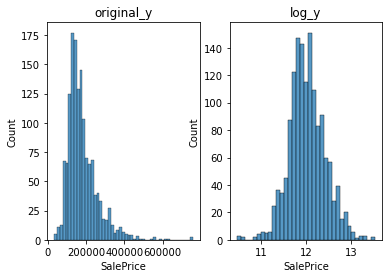

In [7]:
# Check the distribution of data

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt, ax = plt.subplots(1,2)
sns.histplot(y, ax=ax[0])
ax[0].set_title('original_y')
sns.histplot(np.log(y), ax=ax[1])
ax[1].set_title('log_y')

print('skew is {}'.format(y.skew()))
print('kurtosis is {}'.format(y.kurt()))

print('skew of log is {}'.format(np.log(y).skew()))
print('kurtosis of log is {}'.format(np.log(y).kurt()))

# Normalize the target data
y = np.log(y)



In [8]:
# Select numeric features and create new features
numeric_features = df.select_dtypes(exclude = 'object').columns

# Drop new has_or_not features 
# Drop categorical features
numeric_features = numeric_features.drop(['MSSubClass','MoSold', 'YrSold',
                                          'HasBasement','HasPool','HasGarage','HasWoodDeck',
                                          'OverallQual', 'OverallCond'])

# Check the skew of numeric data
df[numeric_features].skew().sort_values(ascending = False)

MiscVal           21.958480
PoolArea          16.907017
LotArea           12.829025
LowQualFinSF      12.094977
KitchenAbvGr       4.304467
BsmtFinSF2         4.148275
MasVnrArea         2.614936
TotalPorch         2.238417
WoodDeckSF         1.843380
TotalHouseSF       1.512256
LotFrontage        1.499348
BsmtFinSF1         1.425963
GrLivArea          1.270010
BsmtUnfSF          0.919812
TotRmsAbvGrd       0.758757
Fireplaces         0.733872
Duration           0.598917
TotalBathrooms     0.497971
BedroomAbvGr       0.326492
GarageArea         0.241770
GarageCars        -0.217611
YearRemodAdd      -0.451252
YearBuilt         -0.600114
GarageYrBlt       -3.937352
dtype: float64

In [38]:
# nomalize high_skewed data using np.log1p
# since np.log() doesn't work if devided by 0

high_skew = df[numeric_features].skew()[np.abs(df[numeric_features].skew())>0.5].index
for col in high_skew:
    if min(df[col]) > 0:
        df[col] = np.log1p(df[col])
    else:
        df[col] = np.log1p(df[col] + min(df[col]))

In [39]:
# Check the skew of numeric data again
df[numeric_features].skew().sort_values(ascending = False)

PoolArea          14.917125
LowQualFinSF       8.414667
MiscVal            5.068693
BsmtFinSF2         2.383255
KitchenAbvGr       2.243372
TotalBathrooms     0.497971
MasVnrArea         0.454676
BedroomAbvGr       0.326492
GarageArea         0.241770
Fireplaces         0.237710
WoodDeckSF         0.158114
TotRmsAbvGrd       0.035125
GrLivArea          0.013194
GarageCars        -0.217611
TotalHouseSF      -0.368624
YearRemodAdd      -0.451252
YearBuilt         -0.629647
BsmtFinSF1        -0.732341
TotalPorch        -0.796441
LotArea           -0.893911
LotFrontage       -1.382920
Duration          -1.475113
BsmtUnfSF         -2.789417
GarageYrBlt       -3.957880
dtype: float64

In [40]:
df.shape

(2919, 76)

# Encoding categorical features

In [41]:
# MoSold and YrSold is not ordinal
# Since a earlier or later sell doesn't mean a higher or lower prices
nominal_features = ['MSSubClass','MSZoning','Street','Alley','LandContour', 'LotConfig', 
                    'Neighborhood','Condition1', 'Condition2','BldgType', 'HouseStyle',
                    'RoofStyle', 'RoofMatl','Exterior1st','Exterior2nd', 'MasVnrType','Foundation', 
                    'Heating','CentralAir', 'GarageType','MiscFeature',
                    'SaleType', 'SaleCondition','MoSold', 'YrSold']

ordinal_features = ['LotShape','Utilities','LandSlope','OverallQual','OverallCond','ExterQual',
                    'ExterCond','BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1', 'BsmtFinType2',
                    'HeatingQC','Electrical','KitchenQual','Functional','FireplaceQu','GarageFinish', 
                    'GarageQual','GarageCond','PoolQC', 'Fence','PavedDrive',
                    'HasBasement','HasPool','HasGarage','HasWoodDeck']

In [42]:
# Create transformers for the different variable types. 
# For numeric transformer, applies a MinMaxScalor
# For categorical transformer, create binary variables with an OneHotEncoder
# Apply the transformations to the correct columns using a ColumnTransformer.


from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers = [('num', MinMaxScaler(), numeric_features),
                               ('ord', OrdinalEncoder(), ordinal_features),
                                             ('nom',OneHotEncoder(handle_unknown = 'ignore'), nominal_features)])

df_trans = pd.DataFrame(ct.fit_transform(df)) 
X = df_trans.iloc[:len(y), :]
val = df_trans.iloc[len(y):, :]

# Model Selection

In [43]:
# Model Selection
# Use a small set of data to reduce time

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 0)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# GaussianNB reports an error as 'A sparse matrix was passed, but dense data is required'
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

models = pd.DataFrame(columns=["Model","train score","test score","rmse"])

regressors = [LinearRegression(),
              Ridge(),
              RandomForestRegressor(n_estimators = 100), 
              GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1),
              XGBRegressor(n_estimators = 100, learning_rate = 0.1),
              MLPRegressor()]
for reg in regressors:
    reg.fit(X_train, y_train)
    predictions = reg.predict(X_test)
    new_row = {"Model": reg,
               "train score": reg.score(X_train, y_train), 
               "test score": reg.score(X_test, y_test), 
               "rmse": mean_squared_error(y_test, predictions, squared = False)}
    models = models.append(new_row, ignore_index=True)

models
       

,Model,train score,test score,rmse
0,LinearRegression(),0.950993,-1.340791e+19,1.412098e+09
1,Ridge(),0.945783,8.478669e-01,1.504167e-01
2,"(DecisionTreeRegressor(max_features='auto', ra...",0.982879,8.739979e-01,1.368904e-01
3,([DecisionTreeRegressor(criterion='friedman_ms...,0.964077,8.955823e-01,1.246153e-01
4,"XGBRegressor(base_score=None, booster=None, ca...",0.990645,8.949542e-01,1.249895e-01
5,MLPRegressor(),0.927734,6.871119e-01,2.157142e-01


In [45]:
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import mean_squared_error

def grid_search(X_train, y_train):
    param_tuning = {'learning_rate' : [0.1], 'max_depth': [3, 5, 7],
        'min_child_weight': [3, 5, 7],
        'subsample': [0.3, 0.5],
        'colsample_bytree': [0.1, 0.3, 0.5],
        'n_estimators' : [100]
    }
    
    gsearch = GridSearchCV(estimator = XGBRegressor(),
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           cv = 5,
                           n_jobs = 2)
    
    gsearch.fit(X_train,y_train)
    pred = gsearch.predict(X_test)
    print(gsearch.best_params_)
    print(gsearch.score(X_train, y_train))
    print(gsearch.score(X_test, y_test))
    print(mean_squared_error(y_test,pred, squared = False))
    

grid_search(X_train, y_train)


{'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.3}
0.9611437770104182
0.881059429479858
0.13299926876990417


In [17]:
from sklearn.metrics import mean_squared_error

xgb_model = XGBRegressor(colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 7, 
                         min_child_weight = 5, n_estimators = 100, subsample = 0.3)
xgb_model.fit(X_train,y_train)
xgb_model.score(X_train, y_train)
pred = xgb_model.predict(X_test)


print(xgb_model.score(X_train, y_train))
print(xgb_model.score(X_test, y_test))
print(mean_squared_error(y_test,pred,squared = False))

0.9611966068548835
0.8808214770634972
0.13313224141566865


In [18]:
submission = pd.DataFrame()
submission['Id'] = np.arange(1461, 2920, 1)
submission['SalePrice'] = pd.DataFrame(np.exp(xgb_model.predict(val)))
submission.to_csv("new_submission.csv", index=False)